# Mapping The Multivariate Time-Series Relationship Between INR Currency Value (Against USD) And NIFTY50 Index

## Introduction

The health of the economy is often linked with the currency value. The currency value of the country (most commonly measured against USD), is a showcase of the global economic power of the country, as it is a shadow of its stance in the global trades. Moreover, another indicator of the economy of a country is the stock market index of the country. It gives a general idea of the trend of the country’s economy. It is almost logical to club these two important aspects affecting the economy together to gain a complete picture. But the question arises, do these factors affect each other?

In most developed countries with market-based economies, the correlation between the currency value and the stock index of that country in a market-based economy is fairly logical. The strength of the market gauged by the stock market index clearly shows that the country is doing better in the global trades, having an effect of the exchange value of the currency. However, such a correlation is not always this obvious for predominantly bank-based financial systems, such as in developing countries. Several of these countries have a mixed financial system (bank and market), and these makes the analysis and the correlation of such factors fairly complicated.

India is such an economy, where there is a market-based aspect in its financial system, but is predominantly bank based. In cases such as India, as mentioned, there needs to be a further analysis if such a correlation even exists, and if it does, to what extent?

## Research Design

The datasets for INR currency value and NIFTY50 index were taken from Yahoo! Finance. The following links can be referred to for the same:
INR currency value: https://finance.yahoo.com/quote/INR=X/history/
NIFTY50 index: https://finance.yahoo.com/quote/%5ENSEI/history?p=%5ENSEI

The dataset was taken from 03/01/2022 – 06/11/2023 range, in the interest of keeping the impact of COVID-19 fluctuations on the economy out of the analysis, and to keep the data relevant so that the resulting analysis is also relevant. A weekly frequency was taken, to find the sweet spot between having enough training examples for the model parameter fitting and to ensure enough significant digits change between each training example (the currency value doesn’t change drastically in a daily frequency, and a monthly frequency would result in only 18 training examples).

Because this a multivariate time-series analysis, the algorithm ARIMA(p, d, q) is explored. Since this model converges into VAR for (p, 0, 0), and into MA for (0, 0, q), finding an optimal model will be easy in Python code in this all-in-one algorithm. Moreover, both of the factors, INR currency value and NIFTY50 index, will have their own models treating the other as an independent variable. Further analysis will be done after the models are constructed.

An important aspect is to find whether these factors forecast each other or not. This will be done using the granger causality test. Furthermore, since this study is done from scratch and no model is already present, the tests for stationarity won’t be done using graphical or unit root method, rather, Augmented Dickey-Fuller (ADF) test will be used. The p-value computed should be lower than 0.05 to be considered as stationary. This analysis will be included in the methodology.

## Implementation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('dataset.csv')
date = pd.to_datetime(dataset['date'], dayfirst = True)
dataset = dataset.drop(columns = ['date'])
dataset.index = date
print(dataset)

                  index      value
date                              
2022-01-03  17812.69922  74.467300
2022-01-10  18255.75000  73.972298
2022-01-17  17617.15039  74.452202
2022-01-24  17101.94922  74.994301
2022-01-31  17516.30078  74.643898
...                 ...        ...
2023-10-09  19751.05078  83.262398
2023-10-16  19542.65039  83.122299
2023-10-23  19047.25000  83.282501
2023-10-30  19230.59961  83.247299
2023-11-06  19411.75000  83.158501

[97 rows x 2 columns]


In [3]:
dataset.head(10)

,index,value
date,,
2022-01-03,17812.69922,74.467300
2022-01-10,18255.75000,73.972298
2022-01-17,17617.15039,74.452202
2022-01-24,17101.94922,74.994301
2022-01-31,17516.30078,74.643898
2022-02-07,17374.75000,75.579597
2022-02-14,17276.30078,75.063004
2022-02-21,16658.40039,75.068001
2022-02-28,16245.34961,76.417999


In [4]:
grangercausalitytests(dataset[['index', 'value']], maxlag=[2])
print()
grangercausalitytests(dataset[['value', 'index']], maxlag=[2])
print()


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.3935  , p=0.0061  , df_denom=90, df_num=2
ssr based chi2 test:   chi2=11.3863 , p=0.0034  , df=2
likelihood ratio test: chi2=10.7540 , p=0.0046  , df=2
parameter F test:         F=5.3935  , p=0.0061  , df_denom=90, df_num=2


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5460  , p=0.5812  , df_denom=90, df_num=2
ssr based chi2 test:   chi2=1.1526  , p=0.5620  , df=2
likelihood ratio test: chi2=1.1457  , p=0.5639  , df=2
parameter F test:         F=0.5460  , p=0.5812  , df_denom=90, df_num=2



In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2022-01-03 to 2023-11-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   97 non-null     float64
 1   value   97 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


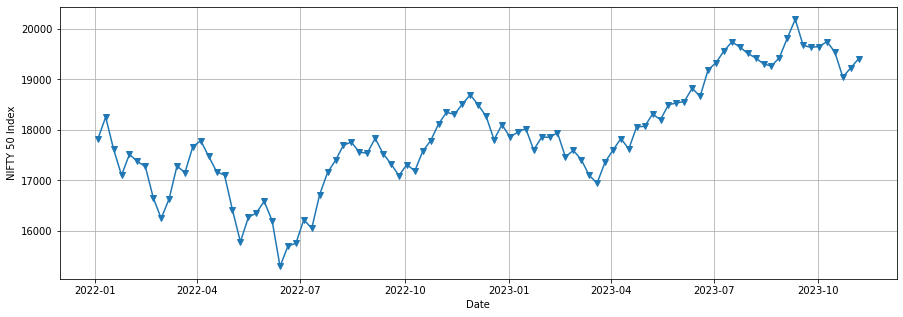

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(dataset['index'], marker='v')
plt.xlabel("Date")
plt.ylabel("NIFTY 50 Index")
plt.grid()
plt.show()

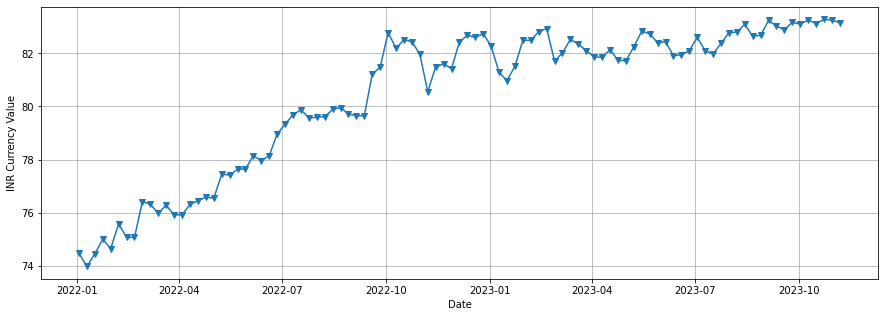

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(dataset['value'], marker='v')
plt.xlabel("Date")
plt.ylabel("INR Currency Value")
plt.grid()
plt.show()

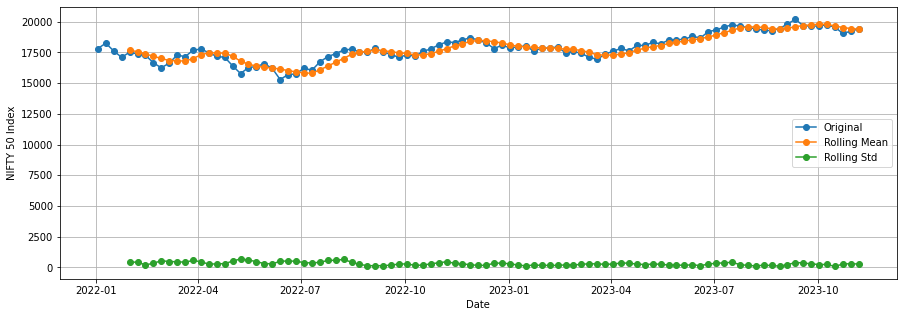

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(dataset['index'], marker='o', label='Original')
plt.plot(dataset['index'].rolling(window = 5).mean(), marker='o', label='Rolling Mean')
plt.plot(dataset['index'].rolling(window = 5).std(), marker='o', label='Rolling Std')
plt.xlabel("Date")
plt.ylabel("NIFTY 50 Index")
plt.grid()
plt.legend()
plt.show()

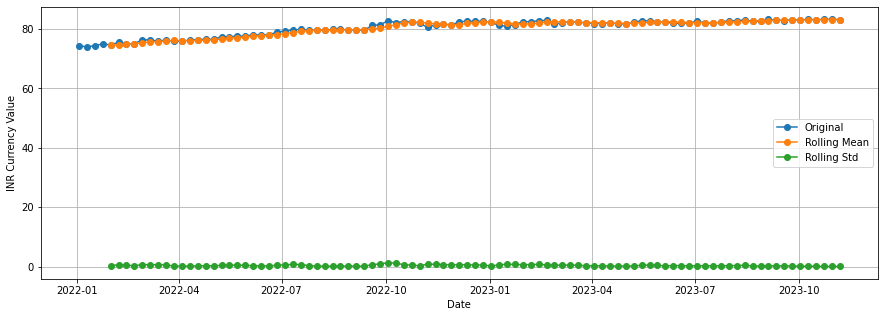

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(dataset['value'], marker='o', label='Original')
plt.plot(dataset['value'].rolling(window = 5).mean(), marker='o', label='Rolling Mean')
plt.plot(dataset['value'].rolling(window = 5).std(), marker='o', label='Rolling Std')
plt.xlabel("Date")
plt.ylabel("INR Currency Value")
plt.grid()
plt.legend()
plt.show()

In [10]:
def check_stationarity(series, signif=0.05, name='', verbose=False):
    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

for name, column in dataset.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')
    
for name, column in dataset.diff().dropna().iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "index" 
    -----------------------------------------------
ADF Statistic: -1.124481
p-value: 0.705211
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
Non-stationary


    Augmented Dickey-Fuller Test on "value" 
    -----------------------------------------------
ADF Statistic: -2.464345
p-value: 0.124392
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Non-stationary


    Augmented Dickey-Fuller Test on "index" 
    -----------------------------------------------
ADF Statistic: -9.250169
p-value: 0.000000
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583
Stationary


    Augmented Dickey-Fuller Test on "value" 
    -----------------------------------------------
ADF Statistic: -6.407840
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Stationary




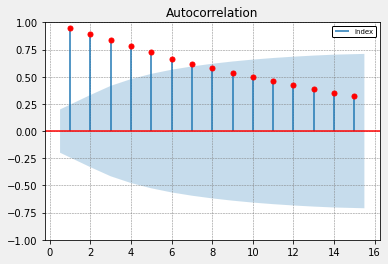

In [11]:
fig, ax = plt.subplots(nrows=1, facecolor="#F0F0F0")
plot_acf(dataset['index'], lags=15, alpha=0.05, zero=False, ax=ax, color="red")
ax.legend(["index"], loc="upper right", fontsize="x-small", framealpha=1, edgecolor="black", shadow=None)
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

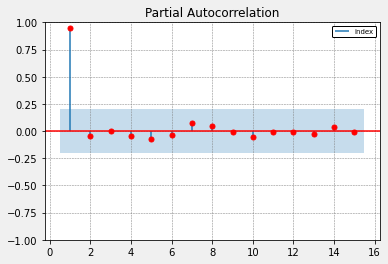

In [12]:
fig, ax = plt.subplots(nrows=1, facecolor="#F0F0F0")
plot_pacf(dataset['index'], lags=15, alpha=0.05, zero=False, ax=ax, color="red")
ax.legend(["index"], loc="upper right", fontsize="x-small", framealpha=1, edgecolor="black", shadow=None)
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

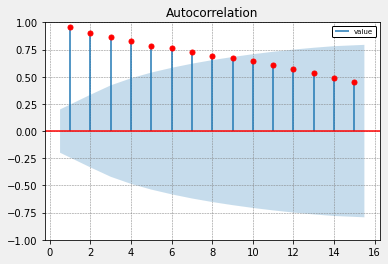

In [13]:
fig, ax = plt.subplots(nrows=1, facecolor="#F0F0F0")
plot_acf(dataset['value'], lags=15, alpha=0.05, zero=False, ax=ax, color="red")
ax.legend(["value"], loc="upper right", fontsize="x-small", framealpha=1, edgecolor="black", shadow=None)
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

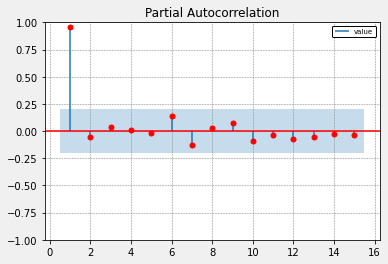

In [14]:
fig, ax = plt.subplots(nrows=1, facecolor="#F0F0F0")
plot_pacf(dataset['value'], lags=15, alpha=0.05, zero=False, ax=ax, color="red")
ax.legend(["value"], loc="upper right", fontsize="x-small", framealpha=1, edgecolor="black", shadow=None)
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

In [15]:
trainDataset = dataset[:int(0.95*97)]
testDataset = dataset[int(0.95*97):]

print(trainDataset.shape, testDataset.shape)

(92, 2) (5, 2)


                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   92
Model:                 ARIMA(1, 1, 6)   Log Likelihood                -649.422
Date:                Wed, 15 Nov 2023   AIC                           1316.844
Time:                        01:53:45   BIC                           1339.441
Sample:                    01-03-2022   HQIC                          1325.960
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -168.4903     82.797     -2.035      0.042    -330.770      -6.211
ar.L1          0.7886      0.870      0.906      0.365      -0.917       2.494
ma.L1         -0.6754      0.900     -0.750      0.4

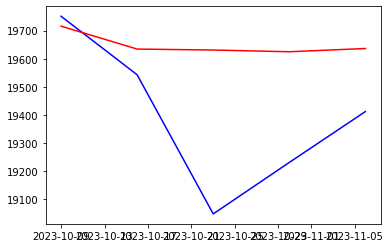

Root Mean Squared Error 333.3894757405637


In [16]:
model = ARIMA(trainDataset['index'], exog=trainDataset['value'], order=(1, 1, 6))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps = 5, exog = testDataset['value'])
print(pred, testDataset['index'])
plt.plot(testDataset['index'], color='blue')
plt.plot(pred, color='red')
plt.show()

print("Root Mean Squared Error", math.sqrt(mean_squared_error(testDataset['index'], pred)))

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   92
Model:                 ARIMA(1, 1, 7)   Log Likelihood                -648.573
Date:                Wed, 15 Nov 2023   AIC                           1317.145
Time:                        01:53:45   BIC                           1342.254
Sample:                    01-03-2022   HQIC                          1327.275
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -168.0044     91.443     -1.837      0.066    -347.228      11.220
ar.L1          0.2852      1.267      0.225      0.822      -2.199       2.769
ma.L1         -0.1868      1.253     -0.149      0.8

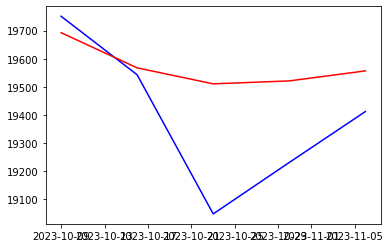

Root Mean Squared Error 254.4272952940381


In [17]:
model = ARIMA(trainDataset['index'], exog=trainDataset['value'], order=(1, 1, 7))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps = 5, exog = testDataset['value'])
print(pred, testDataset['index'])
plt.plot(testDataset['index'], color='blue')
plt.plot(pred, color='red')
plt.show()

print("Root Mean Squared Error", math.sqrt(mean_squared_error(testDataset['index'], pred)))

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   92
Model:                 ARIMA(2, 1, 6)   Log Likelihood                -649.093
Date:                Wed, 15 Nov 2023   AIC                           1318.187
Time:                        01:53:46   BIC                           1343.295
Sample:                    01-03-2022   HQIC                          1328.316
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -170.2973     53.933     -3.158      0.002    -276.004     -64.591
ar.L1         -0.7272      0.032    -22.486      0.000      -0.791      -0.664
ar.L2         -0.9872      0.033    -30.113      0.0

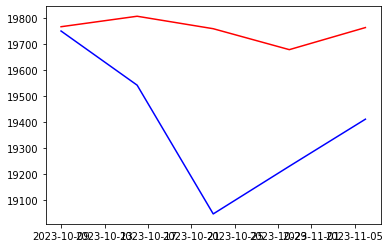

Root Mean Squared Error 425.23589340969517


In [18]:
model = ARIMA(trainDataset['index'], exog=trainDataset['value'], order=(2, 1, 6))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps = 5, exog = testDataset['value'])
print(pred, testDataset['index'])
plt.plot(testDataset['index'], color='blue')
plt.plot(pred, color='red')
plt.show()

print("Root Mean Squared Error", math.sqrt(mean_squared_error(testDataset['index'], pred)))

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   92
Model:                 ARIMA(2, 1, 7)   Log Likelihood                -649.143
Date:                Wed, 15 Nov 2023   AIC                           1320.285
Time:                        01:53:47   BIC                           1347.905
Sample:                    01-03-2022   HQIC                          1331.428
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -170.3218     58.911     -2.891      0.004    -285.786     -54.857
ar.L1          0.6830      0.042     16.137      0.000       0.600       0.766
ar.L2         -0.9261      0.045    -20.807      0.0

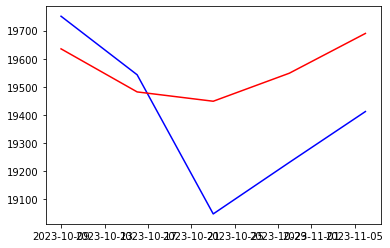

Root Mean Squared Error 266.961608429657


In [19]:
model = ARIMA(trainDataset['index'], exog=trainDataset['value'], order=(2, 1, 7))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps = 5, exog = testDataset['value'])
print(pred, testDataset['index'])
plt.plot(testDataset['index'], color='blue')
plt.plot(pred, color='red')
plt.show()

print("Root Mean Squared Error", math.sqrt(mean_squared_error(testDataset['index'], pred)))

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   92
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -652.328
Date:                Wed, 15 Nov 2023   AIC                           1310.656
Time:                        01:53:47   BIC                           1318.189
Sample:                    01-03-2022   HQIC                          1313.695
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -170.3056     84.026     -2.027      0.043    -334.994      -5.617
ar.L1          0.0847      0.097      0.872      0.383      -0.106       0.275
sigma2      9.939e+04   1.54e+04      6.471      0.0

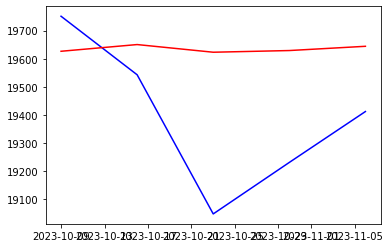

Root Mean Squared Error 337.9860193510138


In [20]:
model = ARIMA(trainDataset['index'], exog=trainDataset['value'], order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps = 5, exog = testDataset['value'])
print(pred, testDataset['index'])
plt.plot(testDataset['index'], color='blue')
plt.plot(pred, color='red')
plt.show()

print("Root Mean Squared Error", math.sqrt(mean_squared_error(testDataset['index'], pred)))

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   92
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -652.272
Date:                Wed, 15 Nov 2023   AIC                           1310.544
Time:                        01:53:47   BIC                           1318.076
Sample:                    01-03-2022   HQIC                          1313.583
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -170.3056     82.890     -2.055      0.040    -332.767      -7.844
ma.L1          0.0959      0.102      0.942      0.346      -0.104       0.295
sigma2      9.564e+04   1.43e+04      6.709      0.0

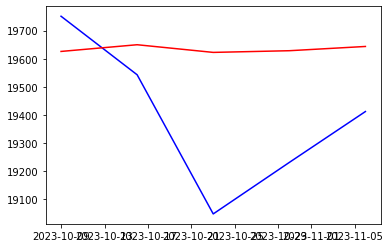

Root Mean Squared Error 337.557323629531


In [21]:
model = ARIMA(trainDataset['index'], exog=trainDataset['value'], order=(0, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

pred = model_fit.forecast(steps = 5, exog = testDataset['value'])
print(pred, testDataset['index'])
plt.plot(testDataset['index'], color='blue')
plt.plot(pred, color='red')
plt.show()

print("Root Mean Squared Error", math.sqrt(mean_squared_error(testDataset['index'], pred)))

In [22]:
model = ARIMA(dataset['index'], exog=dataset['value'], order=(1, 1, 7))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   97
Model:                 ARIMA(1, 1, 7)   Log Likelihood                -683.043
Date:                Wed, 15 Nov 2023   AIC                           1386.086
Time:                        01:53:47   BIC                           1411.729
Sample:                    01-03-2022   HQIC                          1396.451
                         - 11-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value       -168.7150     88.961     -1.897      0.058    -343.075       5.645
ar.L1          0.2653      1.024      0.259      0.795      -1.741       2.272
ma.L1         -0.1733      1.010     -0.171      0.8

In [23]:
pred = model_fit.forecast(steps = 1, exog = [83.2989])
print(pred[0], [19443.55])
print("Root Mean Squared Error", math.sqrt(mean_squared_error([19443.55], pred)))

19426.247743469045 [19443.55]
Root Mean Squared Error 17.302256530954764
